Normalizar <br>
Rodar 21 vezes <br>
Combinar os paretos (concatenar) <br>
Rodar dominância nos combinados  <br>
Ponto de nadir dos combinados -> ponto de referência para o hipervolume <br>


In [87]:
from pymoo.factory import get_problem, get_reference_directions
from pymoo.util.plotting import plot
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.algorithms.moo.moead import MOEAD
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
from pymoo.factory import get_performance_indicator

import json

def max_value(inputarray):  
    return max([sublist[0] for sublist in inputlist])

def compare_algorithms(n_iter, n_gen, n_obj, save_json=False):
    """[Runs MOEAD, NSGA2 and NSGA3 on a benchmark problem and outputs everything to a dict. Saving to json is optional.]

    Args:
        n_iter ([int]): [Number of iterations to run]
        n_gen ([int]): [description]
        n_obj ([int]): [description]
        save_json (bool, optional): [description]. Defaults to False.

    Returns:
        [type]: [Dict containing metrics provided]
    """    
    ref_dirs = get_reference_directions("das-dennis", n_obj, n_partitions=6)

    pop_size = ref_dirs.shape[0] # population size as a minimum to match ref dirs

    problem = get_problem("dtlz1")
    problem.n_obj = n_obj

    alg1 = NSGA2(pop_size=pop_size)
    alg2 = NSGA3(pop_size=pop_size,
                ref_dirs=ref_dirs)
    alg3 = MOEAD(ref_dirs,
                n_neighbors=3,
                prob_neighbor_mating=0.7)

    # timing1 = []
    # timing2 = []
    timing3 = []

    # igd_plus1 = []
    # igd_plus2 = []
    hypervolume3 = []

    for i in range(n_iter):
        # sol1 = minimize(problem,
        #                 alg1,
        #                 ('n_gen', n_gen),
        #                 seed=42,
        #                 verbose=False)

        # sol2 = minimize(problem,
        #                 alg2,
        #                 ('n_gen', n_gen),
        #                 seed=42,
        #                 verbose=False)

        sol3 = minimize(problem,
                        alg1,
                        ('n_gen', n_gen),
                        seed=42,
                        verbose=False)

        
        # timing1.append(sol1.exec_time)
        # timing2.append(sol2.exec_time)
        timing3.append(sol3.exec_time)

        # igd_plus1_temp = get_performance_indicator("igd+", problem.pareto_front())
        # igd_plus1.append(igd_plus1_temp.do(sol1.F))

        # igd_plus2_temp = get_performance_indicator("igd+", problem.pareto_front())
        # igd_plus2.append(igd_plus2_temp.do(sol2.F))

        hypervolume3_temp = get_performance_indicator("gd", problem.pareto_front())
        hypervolume3.append(hypervolume3_temp.do(sol3.F))

        print('Iteration ' + str(i) + ' executed.')

    output = {
            # 'timings_nsga_ii': timing1,
            # 'igd_nsga_ii': igd_plus1,
            # 'timings_nsga_iigd_plus': timing2,
            # 'igd_nsga_iii': igd_plus2,
            'timings_moead': timing3,
            'igd_moead': hypervolume3}

    sols = sol3 # sol1, sol2, sol3

    if save_json:
        json_string = json.dumps(output)
        with open('output_dtlz1_'+str(n_obj)+'_objs.json','w') as outfile:
            outfile.write(json_string)

    return output, problem, sols

In [125]:
n_iter = 3
n_gen = 50
n_obj = 4
pop_size = 200


problem = get_problem("dtlz1")

alg = NSGA2(pop_size=pop_size)

hypervolume3 = []

for i in range(n_iter):
        sol = minimize(problem,
                        alg,
                        ('n_gen', n_gen),
                        seed=42,
                        verbose=False)

        hypervolume3_temp = get_performance_indicator("hv", ref_point = problem.nadir_point())
        hypervolume3.append(hypervolume3_temp.do(sol.F))

        print('Iteration ' + str(i) + ' executed.')



Iteration 0 executed.
Iteration 1 executed.
Iteration 2 executed.


In [148]:


lista = [[1,2],[3,4],[5,6]]

max_value(lista)


5

In [144]:
sol.F

array([[1.34769871e+01, 1.18380976e-03, 5.51529054e-03],
       [1.13079060e+01, 5.08634864e+00, 1.62825905e-01],
       [1.79486599e+01, 4.12489825e-04, 5.62945928e-02],
       [1.83375351e+01, 1.75811310e-04, 5.75134997e-02],
       [9.83461070e-05, 1.92037562e-03, 1.49920827e+01],
       [2.85059494e-04, 1.33411699e-06, 1.59848942e+01],
       [6.60332952e+00, 8.96276809e-01, 3.74947838e+00],
       [1.73935820e-07, 2.15658409e+01, 6.95030063e-04],
       [2.79925641e-01, 2.45884859e-05, 1.26837071e+01],
       [1.24756518e+01, 2.97390379e-01, 9.47795791e-07],
       [2.42710448e+01, 1.89214905e-02, 4.15062033e-09],
       [1.35365375e+01, 7.96813868e-06, 1.03818333e-01],
       [3.60453303e-05, 7.03846605e-04, 1.49933616e+01],
       [1.23145284e+01, 1.08170015e-03, 6.48047234e-01],
       [8.25077362e+00, 4.14983686e+00, 2.47517485e-01],
       [1.27435923e+01, 1.11938885e-03, 1.06521747e-01],
       [7.75603452e-04, 7.09424019e+00, 8.68890661e-01],
       [1.97033295e+01, 8.09399

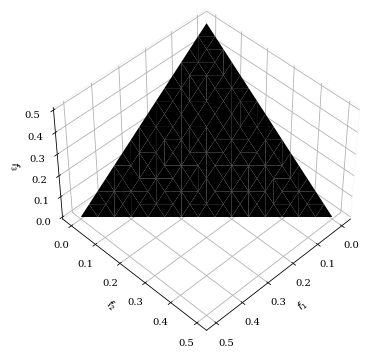

In [136]:
plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black")
plot.add(sol.F, facecolor="none", edgecolor="green")
plot.show()


In [129]:
problem.nadir_point()

array([0.5, 0.5, 0.5])

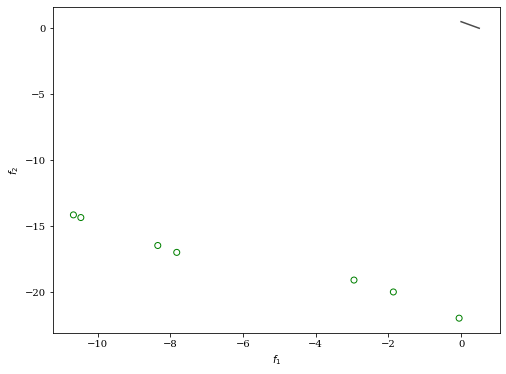

In [19]:
plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
# plot.add(sol1.F, facecolor="none", edgecolor="red")
# plot.add(sol2.F, facecolor="none", edgecolor="blue")
plot.add(sols[2].F, facecolor="none", edgecolor="green")
plot.show()
